In [19]:
import geopandas as gp
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA

In [2]:
filename = 'POWER_Point_Monthly_Timeseries_1981_2020_046d2199N_119d0837W_LST.json'

In [3]:
df = gp.read_file(filename)
df.head()

,parameter,geometry
0,"{'ALLSKY_KT': {'198401': 0.48, '198402': 0.46,...",POINT Z (-119.08370 46.21990 311.81000)


In [4]:
df['parameter'][0]

{'ALLSKY_KT': {'198401': 0.48,
  '198402': 0.46,
  '198403': 0.53,
  '198404': 0.55,
  '198405': 0.55,
  '198406': 0.58,
  '198407': 0.65,
  '198408': 0.62,
  '198409': 0.58,
  '198410': 0.53,
  '198411': 0.43,
  '198412': 0.47,
  '198413': 0.56,
  '198501': 0.59,
  '198502': 0.52,
  '198503': 0.62,
  '198504': 0.62,
  '198505': 0.65,
  '198506': 0.64,
  '198507': 0.65,
  '198508': 0.62,
  '198509': 0.55,
  '198510': 0.5,
  '198511': 0.45,
  '198512': 0.55,
  '198513': 0.6,
  '198601': 0.47,
  '198602': 0.48,
  '198603': 0.55,
  '198604': 0.6,
  '198605': 0.59,
  '198606': 0.64,
  '198607': 0.6,
  '198608': 0.65,
  '198609': 0.56,
  '198610': 0.61,
  '198611': 0.41,
  '198612': 0.44,
  '198613': 0.58,
  '198701': 0.5,
  '198702': 0.55,
  '198703': 0.59,
  '198704': 0.62,
  '198705': 0.61,
  '198706': 0.63,
  '198707': 0.59,
  '198708': 0.65,
  '198709': 0.66,
  '198710': 0.61,
  '198711': 0.48,
  '198712': 0.48,
  '198713': 0.6,
  '198801': 0.48,
  '198802': 0.6,
  '198803': 0.56,
  '1

In [5]:
type(df['parameter'][0])

dict

In [6]:
Idict = df['parameter'][0]

In [7]:
Idf =  pd.DataFrame.from_dict(Idict)
Idf

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UV_INDEX
198401,0.48,67.89,0.70,3.13,-999.00,-999.00,0.29,-999.00,1.49,2.18,-999.00,-999.00,-999.00,-999
198402,0.46,70.16,0.72,4.68,-999.00,-999.00,0.24,-999.00,2.16,3.35,-999.00,-999.00,-999.00,-999
198403,0.53,66.52,0.74,6.90,-999.00,-999.00,0.21,-999.00,3.68,5.14,-999.00,-999.00,-999.00,-999
198404,0.55,67.84,0.76,9.15,-999.00,-999.00,0.15,-999.00,5.07,6.92,-999.00,-999.00,-999.00,-999
198405,0.55,69.68,0.74,10.82,-999.00,-999.00,0.19,-999.00,6.04,8.00,-999.00,-999.00,-999.00,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202009,0.57,42.00,0.63,7.58,9.58,0.20,0.17,5.65,4.32,4.81,78.59,1.37,87.06,-999
202010,0.59,51.23,0.70,5.32,6.95,0.12,0.18,4.88,3.13,3.68,56.94,1.10,67.59,-999
202011,0.48,61.96,0.68,3.50,3.64,0.04,0.17,2.96,1.67,2.38,29.96,0.76,42.98,-999
202012,0.38,68.55,0.66,2.71,2.26,0.02,0.17,2.02,1.02,1.80,18.22,0.51,31.94,-999


In [8]:
Prophetdf = pd.DataFrame(Idf['ALLSKY_KT'])
type(Prophetdf)
Prophetdf

,ALLSKY_KT
198401,0.48
198402,0.46
198403,0.53
198404,0.55
198405,0.55
...,...
202009,0.57
202010,0.59
202011,0.48
202012,0.38


In [9]:
Prophetdf['ALLSKY_KT'][0]

0.48

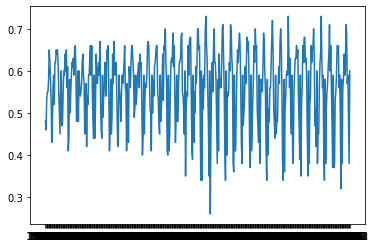

In [10]:
plt.plot(Prophetdf['ALLSKY_KT'][:])

In [11]:
Prophetdf.index[12::13]

Index(['198413', '198513', '198613', '198713', '198813', '198913', '199013',
       '199113', '199213', '199313', '199413', '199513', '199613', '199713',
       '199813', '199913', '200013', '200113', '200213', '200313', '200413',
       '200513', '200613', '200713', '200813', '200913', '201013', '201113',
       '201213', '201313', '201413', '201513', '201613', '201713', '201813',
       '201913', '202013'],
      dtype='object')

In [12]:
Prophetdf=Prophetdf.rename(columns={"ALLSKY_KT": "y"})


def append(dfseries):
    dfseries = dfseries[:4] + '/' + dfseries[4:]
    return dfseries
print(Prophetdf.index[12::13])
print(Prophetdf.shape)
Prophetdf = Prophetdf.drop(Prophetdf.index[12::13])
print(Prophetdf.shape)
Prophetdf['ds']=Prophetdf.index
Prophetdf['ds']= Prophetdf['ds'].astype(str)

Prophetdf['ds'] = Prophetdf['ds'].apply(append)
#a_string = a_string[:1] + "b" + a_string[1:]
Prophetdf

Index(['198413', '198513', '198613', '198713', '198813', '198913', '199013',
       '199113', '199213', '199313', '199413', '199513', '199613', '199713',
       '199813', '199913', '200013', '200113', '200213', '200313', '200413',
       '200513', '200613', '200713', '200813', '200913', '201013', '201113',
       '201213', '201313', '201413', '201513', '201613', '201713', '201813',
       '201913', '202013'],
      dtype='object')
(481, 1)
(444, 1)


,y,ds
198401,0.48,1984/01
198402,0.46,1984/02
198403,0.53,1984/03
198404,0.55,1984/04
198405,0.55,1984/05
...,...,...
202008,0.69,2020/08
202009,0.57,2020/09
202010,0.59,2020/10
202011,0.48,2020/11


In [13]:
Prophetdf['ds'][26]

'1986/03'

In [14]:
m = Prophet()
m.fit(Prophetdf)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -12.4192


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1033.23   0.000140985       77.7119      0.2112           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       1033.79   3.67377e-06        83.091   4.198e-08       0.001      285  LS failed, Hessian reset 
     199       1033.79    1.5978e-07       70.7129      0.3594           1      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       1033.79   2.59877e-08        73.968      0.2462           1      310   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [17]:
future = m.make_future_dataframe(periods=7300)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7739,2040-11-22,0.371107,0.319550,0.429594
7740,2040-11-23,0.369486,0.313419,0.422251
7741,2040-11-24,0.369318,0.316360,0.424323
7742,2040-11-25,0.370537,0.318766,0.427174
7743,2040-11-26,0.373032,0.314697,0.427838


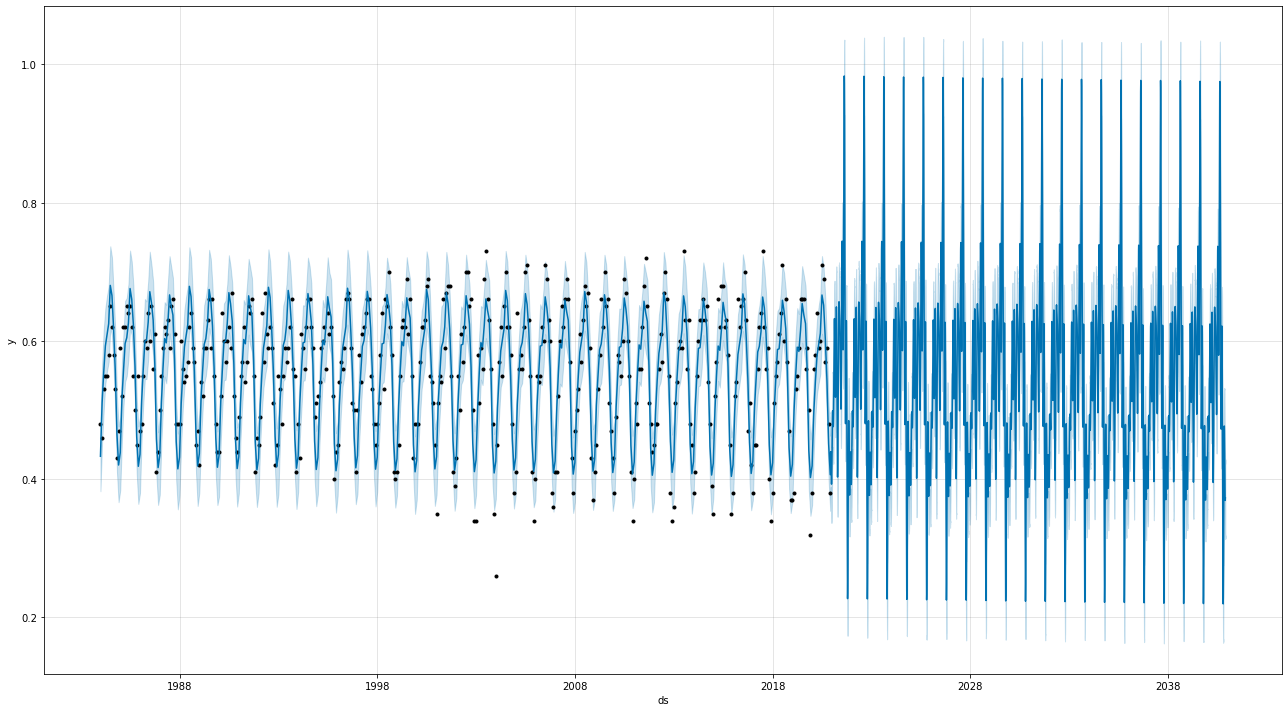

In [18]:
fig1 = m.plot(forecast, figsize=(18,10))

In [47]:
#model = ARIMA(Prophetdf['y'],exog =Prophetdf['ds'], order=(5,1,0))
model = ARIMA(Prophetdf['y'].values, order=(4,1,1))
model_fit = model.fit()

/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [48]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  444
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 613.517
Date:                Wed, 02 Mar 2022   AIC                          -1215.035
Time:                        16:12:22   BIC                          -1190.473
Sample:                             0   HQIC                         -1205.348
                                - 444                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7060      0.047     14.981      0.000       0.614       0.798
ar.L2         -0.0106      0.055     -0.192      0.848      -0.119       0.098
ar.L3         -0.1232      0.059     -2.081      0.0

In [49]:
pred_sol = model_fit.predict(start = 0, end = 600)

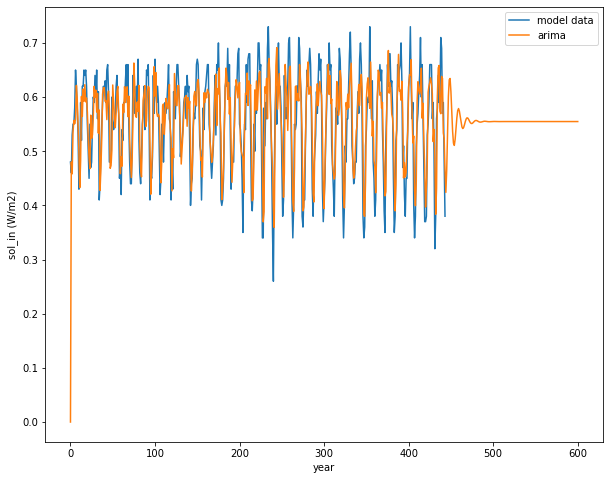

In [50]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(Prophetdf['y'].values,label = 'model data')
ax.plot(pred_sol, label = 'arima')
ax.set_xlabel('year')
ax.set_ylabel('sol_in (W/m2)')
ax.legend()